# ***Packages and Libraries***



In [4]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from scipy.io import wavfile as wav
import pandas as pd
import os
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint


# ***Classes***

In [5]:
data_path = '/content/drive/MyDrive/music_genre/Data/genres_original'
print(list(os.listdir(f'{data_path}')))

['reggae', 'blues', 'metal', 'country', 'disco', 'classical', 'hiphop', 'pop', 'jazz', 'rock']


# ***Studying the Dataset***

***Plot Waveplot***

In [6]:
def plot_audio(data_path):
  plt.figure(figsize=(16,6))
  data, sample_rate = librosa.load(data_path)
  librosa.display.waveplot(data, sr = sample_rate)
  # return data


length (661794,), sample-rate 22050


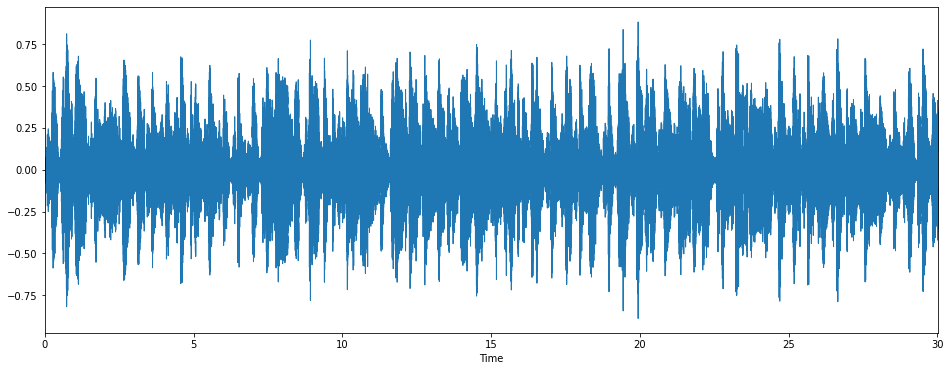

In [8]:
blues_data_path = '/content/drive/MyDrive/music_genre/Data/genres_original/blues/blues.00000.wav'
data, sample_rate = librosa.load(blues_data_path)
data_audio = plot_audio(blues_data_path)
print("length {}, sample-rate {}".format(data.shape, sample_rate))
ipd.Audio(blues_data_path, rate = sample_rate)

length (661504,), sample-rate 22050


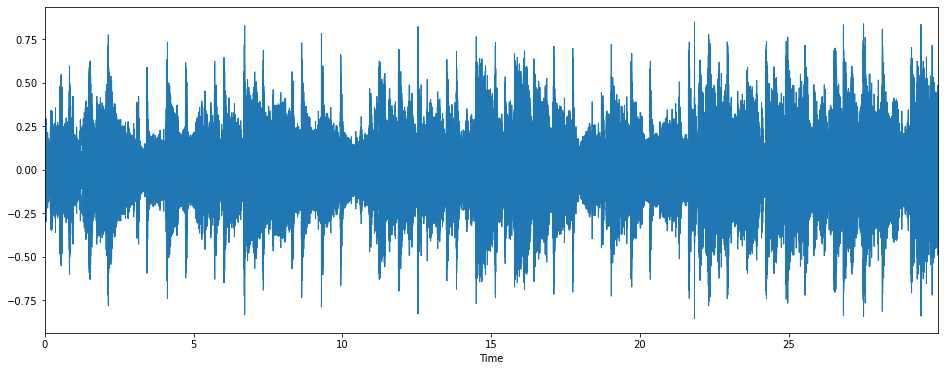

In [10]:
pop_data_path = '/content/drive/MyDrive/music_genre/Data/genres_original/pop/pop.00003.wav'
data, sample_rate = librosa.load(pop_data_path)
data_audio = plot_audio(pop_data_path)
print("length {}, sample-rate {}".format(data.shape, sample_rate))
ipd.Audio(pop_data_path, rate = sample_rate)

length (661504,), sample-rate 22050


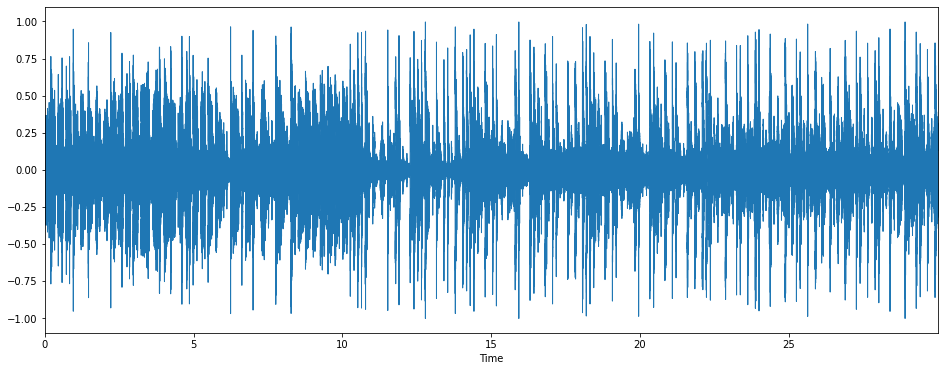

In [12]:
hiphop_data_path = '/content/drive/MyDrive/music_genre/Data/genres_original/hiphop/hiphop.00000.wav'
data, sample_rate = librosa.load(hiphop_data_path)
data_audio = plot_audio(hiphop_data_path)
print("length {}, sample-rate {}".format(data.shape, sample_rate))
ipd.Audio(hiphop_data_path, rate = sample_rate)

length (661794,), sample-rate 22050


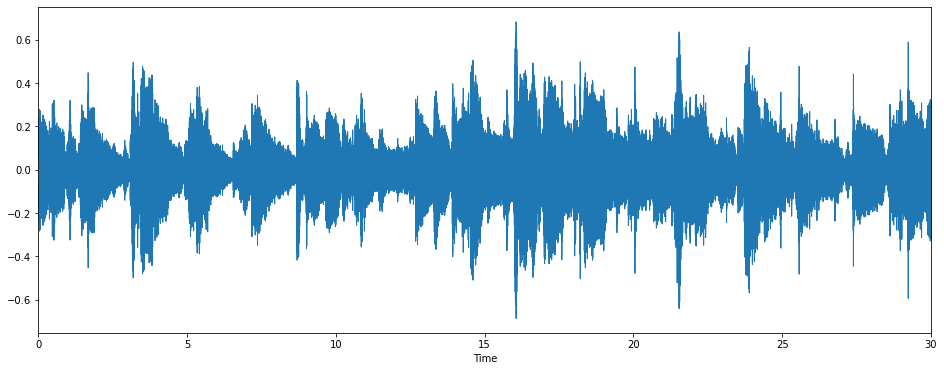

In [14]:
country_data_path = '/content/drive/MyDrive/music_genre/Data/genres_original/country/country.00037.wav'
data, sample_rate = librosa.load(country_data_path)
data_audio = plot_audio(country_data_path)
print("length {}, sample-rate {}".format(data.shape, sample_rate))
ipd.Audio(country_data_path, rate = sample_rate)

In [16]:
wave_sample_rate, wave_audio = wav.read(country_data_path)

In [17]:
wave_sample_rate

22050

In [18]:
wave_audio

array([  737,  1100,  1505, ..., -1764, -2280, -3166], dtype=int16)

***Plot Spectogram***

A spectrogram is a visual representation of the spectrum of frequencies in a sound or other signal as they vary with time or some other variable. Spectrograms are sometimes called spectral waterfalls, voiceprints, or voicegrams.

Spectrograms can be used to identify spoken words phonetically, and to analyse the various calls of animals. They are used extensively in the development of the fields of music, sonar, radar, and speech processing, seismology, etc.

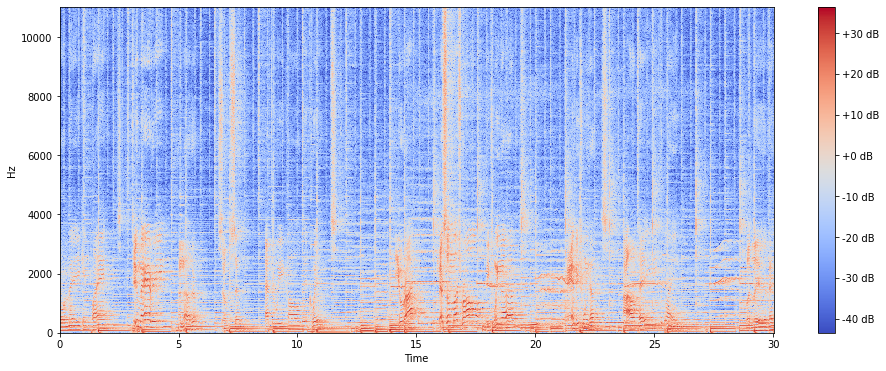

In [19]:
data, sample_rate = librosa.load(country_data_path)


S = librosa.stft(data)
S_db = librosa.amplitude_to_db(abs(S))
# plt.figure(figsize=(16, 6))
# librosa.display.specshow(S_db, sr=sample_rate, x_axis='time', y_axis='hz')
# plt.colorbar()
fig, ax = plt.subplots(figsize=(16,6))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")





The vertical axis represents frequencies (from 0 to 10kHz), and the horizontal axis represents the time of the clip.


# ***Loading the Dataset***

In [20]:
df = pd.read_csv('/content/drive/MyDrive/music_genre/Data/data.csv')
df.head()

class_name       tempo  beats  ...     mfcc19     mfcc20  label
0      blues  103.359375     50  ...  -7.570825   2.918987  blues
1      blues   95.703125     44  ...   3.316913  -0.608485  blues
2      blues  151.999081     75  ... -11.025216 -13.387260  blues
3      blues  184.570312     91  ...  -1.418707  -5.932607  blues
4      blues  161.499023     74  ...   0.024832  -2.005315  blues

[5 rows x 30 columns]

In [21]:
df['label'].value_counts()

jazz         100
disco        100
pop          100
country      100
hiphop       100
blues        100
reggae       100
rock         100
metal        100
classical    100
Name: label, dtype: int64

In [22]:
df.shape

(1000, 30)

In [23]:
df = df.drop(['beats'], axis=1)

In [24]:
df.shape

(1000, 29)

# ***Data Preprocessing***

In [25]:
df['class_name'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [26]:
df['class_name'] = df['class_name'].astype('category')
df['class_label'] = df['class_name'].cat.codes

In [27]:
lookup_genre_name = dict(zip(df.class_label.unique(), df.class_name.unique()))   
lookup_genre_name

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [28]:
df['class_name'].unique()

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Categories (10, object): ['blues', 'classical', 'country', 'disco', ..., 'metal', 'pop', 'reggae',
                          'rock']

In [29]:
cols = list(df.columns)
cols.remove('label')
cols.remove('class_label')
cols.remove('class_name')

***Data splitting for training and testing***

In [30]:
X = df.iloc[:,1:28]
y = df['class_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

***Min-Max Normalization***

In [31]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

# ***K-Nearest Neighbors***

In [32]:
knn = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')
knn.fit(X_train_scaled, y_train)
# knn.score(X_test_scaled, y_test)
y_pred = knn.predict(X_test_scaled)

In [33]:
print("Accuracy:",accuracy_score(y_pred, y_test))

Accuracy: 0.64


In [34]:
print(confusion_matrix(y_pred, y_test))

[[23  0  1  0  3  1  2  0  0  2]
 [ 1 35  1  0  1  0  0  0  1  0]
 [ 3  0 20  1  2  5  0  2  5  4]
 [ 1  0  1 15  4  0  7  5  3  4]
 [ 0  2  0  4 16  1  1  1  4  1]
 [ 2  3  2  0  0 15  0  0  0  1]
 [ 2  0  0  0  2  0 22  0  0  0]
 [ 0  0  1  1  1  0  0 24  3  1]
 [ 0  0  1  0  2  0  0  0 14  2]
 [ 0  0  1  4  1  1  1  0  2  8]]


# ***Feature extraction For Prediction***

In [35]:
def getfeature(filename):
    
    y, sr = librosa.load(filename)
    #fetching tempo

    onset_env = librosa.onset.onset_strength(y, sr)
    tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)

    #fetching beats

    y_harmonic, y_percussive = librosa.effects.hpss(y)
    tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)

    #chroma_stft

    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)

    #rmse

    rmse = librosa.feature.rms(y=y)

    #fetching spectral centroid

    spec_centroid = librosa.feature.spectral_centroid(y, sr=sr)[0]

    #spectral bandwidth

    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    #fetching spectral rolloff

    spec_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]

    #zero crossing rate

    zero_crossing = librosa.feature.zero_crossing_rate(y)

    #mfcc

    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    #feature dictionary

    feature_dict = {'tempo':tempo,'chroma_stft':np.mean(chroma_stft),'rmse':np.mean(rmse),
                     'spectral_centroid':np.mean(spec_centroid),'spectral_bandwidth':np.mean(spec_bw), 
                     'rolloff':np.mean(spec_rolloff), 'zero_crossing_rates':np.mean(zero_crossing)}

    for i in range(1,21):
        feature_dict.update({'mfcc'+str(i):np.mean(mfcc[i-1])})

    return list(feature_dict.values())

In [41]:
a = getfeature("/content/drive/MyDrive/music_genre/test/test1.wav")

# ***Predecting using KNN***

In [42]:
d1 =np.array(a)
data1 = scaler.transform([d1])
genre_prediction = knn.predict(data1)
print(lookup_genre_name[genre_prediction[0]])

jazz


# ***Support Vector Machine***

In [43]:
clf = SVC(kernel = 'linear', C=10)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)


In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6933333333333334


In [45]:
print(confusion_matrix(y_pred, y_test))

[[22  0  5  0  0  2  3  0  1  4]
 [ 0 37  0  0  0  0  0  1  0  0]
 [ 1  2 19  0  0  5  0  0  3  4]
 [ 0  0  0 18  3  0  3  2  3  2]
 [ 0  0  1  2 18  0  1  1  5  0]
 [ 0  1  0  0  0 15  0  0  0  1]
 [ 2  0  0  0  1  0 26  0  0  1]
 [ 0  0  0  1  2  0  0 28  1  1]
 [ 5  0  1  1  6  0  0  0 17  2]
 [ 2  0  2  3  2  1  0  0  2  8]]


# ***Predicting using SVM***

In [46]:
d1 =np.array(a)
data1 = scaler.transform([d1])
genre_prediction = clf.predict(data1)
print(lookup_genre_name[genre_prediction[0]])

jazz




---



## ***Deep Neural Network***

---



# ***Importing Data Set***

In [47]:
Data_Set = pd.read_csv('/content/drive/MyDrive/music_genre/Data/Data_Set.csv') 

In [48]:
# Printing Data Set
Data_Set.head() 

mfcc1_mean  mfcc2_mean  mfcc3_mean  ...  mfcc19_mean  mfcc20_mean  output
0 -118.627914  125.083626  -23.443724  ...    -5.050335    -0.243027   blues
1 -125.590706  122.421226  -20.718019  ...    -2.837699     5.784063   blues
2 -132.441940  115.085175  -14.811666  ...    -1.938424     2.517375   blues
3 -118.231087  132.116501  -18.758335  ...    -3.580352     3.630866   blues
4 -105.968376  134.643646  -19.961748  ...    -3.392489     0.536961   blues

[5 rows x 21 columns]

# ***Label Encoding***

In [49]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
Data_Set['output'] = le.fit_transform(Data_Set['output'])

In [50]:
Data_Set.head()

mfcc1_mean  mfcc2_mean  mfcc3_mean  ...  mfcc19_mean  mfcc20_mean  output
0 -118.627914  125.083626  -23.443724  ...    -5.050335    -0.243027       0
1 -125.590706  122.421226  -20.718019  ...    -2.837699     5.784063       0
2 -132.441940  115.085175  -14.811666  ...    -1.938424     2.517375       0
3 -118.231087  132.116501  -18.758335  ...    -3.580352     3.630866       0
4 -105.968376  134.643646  -19.961748  ...    -3.392489     0.536961       0

[5 rows x 21 columns]

In [51]:
Data_Set['output'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# ***One Hot Encoding***

In [52]:

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [20])], remainder='passthrough')
Data = np.array(ct.fit_transform(Data_Set))

In [53]:
Data[0]

array([   1.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        , -118.6279144 ,  125.0836258 ,
        -23.44372368,   41.32148361,   -5.97610807,   20.11514091,
        -16.04541016,   17.85519791,  -14.6334343 ,   10.27052689,
         -9.70827866,   10.18387508,   -4.6816144 ,    8.41743946,
         -7.23347664,   -2.85360336,   -3.24128032,    0.72220898,
         -5.05033541,   -0.24302679])

In [54]:
#Splliting Data into Input and Output from Data set
x = Data[ : , 10 : ]
y = Data[ : , : 10 ]

In [55]:
print(x[0])

[-118.6279144   125.0836258   -23.44372368   41.32148361   -5.97610807
   20.11514091  -16.04541016   17.85519791  -14.6334343    10.27052689
   -9.70827866   10.18387508   -4.6816144     8.41743946   -7.23347664
   -2.85360336   -3.24128032    0.72220898   -5.05033541   -0.24302679]


In [56]:
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# ***Spliting Data set into training and test set for training model***

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 50)

In [58]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6993, 20)
(2997, 20)
(6993, 10)
(2997, 10)


# ***Building ANN model***

In [59]:
ann_model = tf.keras.models.Sequential()

*Input Layer*

In [60]:
ann_model.add(tf.keras.layers.Dense(units=64 , activation='sigmoid' ,input_shape = (20,) ))

*first Layer*

In [61]:
ann_model.add(tf.keras.layers.Dense(units=128 , activation='sigmoid'))

*Second Layer*

In [62]:
ann_model.add(tf.keras.layers.Dense(units=128 , activation='sigmoid'))

*Output Layer*

In [63]:
ann_model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

ann_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 27,466
Trainable params: 27,466
Non-trainable params: 0
_________________________________________________________________


In [64]:
ann_model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [65]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
check_pointer = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [66]:
history=ann_model.fit(x_train, y_train ,epochs=50, callbacks=[early_stopping,check_pointer], batch_size=10, validation_data=(x_test,y_test))

Epoch 1/50
700/700 [==============================] - 5s 3ms/step - loss: 1.9133 - accuracy: 0.3053 - val_loss: 1.6534 - val_accuracy: 0.3740

Epoch 00001: val_accuracy improved from -inf to 0.37404, saving model to best_model.hdf5
Epoch 2/50
700/700 [==============================] - 2s 3ms/step - loss: 1.5198 - accuracy: 0.4506 - val_loss: 1.5185 - val_accuracy: 0.4618

Epoch 00002: val_accuracy improved from 0.37404 to 0.46180, saving model to best_model.hdf5
Epoch 3/50
700/700 [==============================] - 2s 3ms/step - loss: 1.3961 - accuracy: 0.5077 - val_loss: 1.3756 - val_accuracy: 0.5085

Epoch 00003: val_accuracy improved from 0.46180 to 0.50851, saving model to best_model.hdf5
Epoch 4/50
700/700 [==============================] - 2s 3ms/step - loss: 1.3088 - accuracy: 0.5321 - val_loss: 1.3361 - val_accuracy: 0.5372

Epoch 00004: val_accuracy improved from 0.50851 to 0.53720, saving model to best_model.hdf5
Epoch 5/50
700/700 [==============================] - 2s 3ms/st

*Plot*

<Figure size 1440x1080 with 0 Axes>

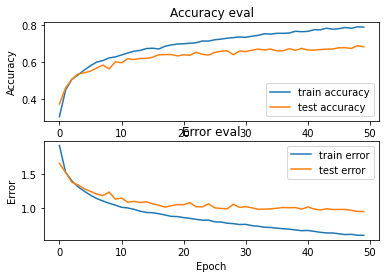

In [67]:
plt.figure(figsize=(20,15))
fig, axs = plt.subplots(2)

# accuracy 
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")    
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")
    
# Error 
axs[1].plot(history.history["loss"], label="train error")
axs[1].plot(history.history["val_loss"], label="test error")    
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")
plt.show()

In [68]:
train_error, train_accuracy = ann_model.evaluate(x_train, y_train, verbose=1)
print(f"Train accuracy: {train_accuracy}")

219/219 [==============================] - 0s 2ms/step - loss: 0.5399 - accuracy: 0.8145
Train accuracy: 0.8145288228988647
